In [1]:
# read jsons for participant and model data
import json
import numpy as np

participant_file = 'participant_data.json'
model_file = 'model_data.json'

from math import sqrt
from scipy.stats import norm


with open(participant_file) as f:
    participant_data = json.load(f)
with open(model_file) as f:
    model_data = json.load(f)

In [2]:
def binomial_confidence_interval(successes, trials, confidence_level=0.95):
    p = successes / trials
    z = norm.ppf((1 + confidence_level) / 2)

    interval = z * sqrt((p * (1 - p)) / trials)
    return interval

In [3]:
collapse = None 

In [4]:
def transform_answer(answer, froma, toa):
    if answer.strip().lower() == froma:
        return toa
    else:
        return answer

In [5]:
condition_num_participants = {}
for condition_names in participant_data.keys():
    # count number of participants
    for scenario_id in range(10):
        participant_answers = participant_data[condition_names][scenario_id]
        if condition_names not in condition_num_participants:
            condition_num_participants[condition_names] = 0
        condition_num_participants[condition_names] += len(participant_answers)

In [6]:
print(participant_data.keys())

dict_keys(['goal_control/outcome_joyful_0', 'safety_expected/emotion_resigned_0', 'safety_expected/belief_a_relieved_1', 'safety_expected/belief_b_relieved_0', 'goal_control/belief_b_joyful_0', 'safety_expected/belief_b_resigned_1', 'goal_control/belief_a_grateful_0', 'safety_expected/emotion_relieved_0', 'goal_control/belief_a_joyful_0', 'goal_control/belief_b_frustrated_1', 'safety_expected/belief_a_surprised_0', 'safety_expected/emotion_relieved_1', 'goal_control/belief_b_joyful_1', 'goal_control/belief_b_grateful_0', 'goal_control/emotion_frustrated_0', 'safety_expected/outcome_surprised_1', 'goal_control/emotion_joyful_1', 'goal_control/belief_a_disappointed_0', 'safety_expected/emotion_surprised_1', 'safety_expected/belief_a_resigned_0', 'goal_control/belief_b_disappointed_1', 'goal_control/outcome_frustrated_1', 'goal_control/belief_a_frustrated_1', 'safety_expected/outcome_relieved_0', 'safety_expected/outcome_devastated_0', 'safety_expected/outcome_relieved_1', 'goal_control/o

In [7]:
pp_agreement_scores = {}
mode = 'majority'
hold = True 
# calculate agreement between participants
if collapse == None:
    for condition_names in participant_data.keys():

        if condition_names not in pp_agreement_scores:
            pp_agreement_scores[condition_names] = []

        for scenario_id in range(10):
            participant_answers = participant_data[condition_names][scenario_id]
            participant_answers = [a.strip().lower() for a in participant_answers]

            # calculate agreement with hold-one-out majority vote
            average_hold_one_out = []
            for i in range(len(participant_answers)):
                if hold:
                    hold_one_out = [a for j, a in enumerate(participant_answers) if j != i]
                else:
                    hold_one_out = participant_answers
                # count answers
                answer_counts = {}
                for a in hold_one_out:
                    if a not in answer_counts:
                        answer_counts[a] = 0
                    answer_counts[a] += 1
                # average hold-one-out
                total_ans = len(hold_one_out)
                answer_counts = {k: v / total_ans for k, v in answer_counts.items()}
                # get majority answer
                majority_answer = max(answer_counts, key=answer_counts.get)

                answer = participant_answers[i]
                if mode == "average":
                    if answer not in answer_counts:
                        pp_agreement_scores[condition_names].append(0)
                    else:
                        pp_agreement_scores[condition_names].append(answer_counts[answer])
                elif mode == "majority":
                    pp_agreement_scores[condition_names].append(1 if answer == majority_answer else 0)


In [8]:
agreement_scores = {}
if collapse == None:
    for model_method in model_data.keys():
        agreement_scores[model_method] = {}
        for condition_names in participant_data.keys():
            if condition_names not in agreement_scores[model_method]:
                agreement_scores[model_method][condition_names] = []
            for scenario_id in range(10):
                participant_answers = participant_data[condition_names][scenario_id]
                participant_answers = [a.strip().lower() for a in participant_answers]

                # calculate agreement with hold-one-out majority vote
                average_hold_one_out = []
                for i in range(len(participant_answers)):
                    hold_one_out = [a for j, a in enumerate(participant_answers) if j != i]
                    if hold:
                        hold_one_out = [a for j, a in enumerate(participant_answers) if j != i]
                    else:
                        hold_one_out = participant_answers
                    # count answers
                    answer_counts = {}
                    for a in hold_one_out:
                        if a not in answer_counts:
                            answer_counts[a] = 0
                        answer_counts[a] += 1
                    # average hold-one-out
                    total_ans = len(hold_one_out)
                    answer_counts = {k: v / total_ans for k, v in answer_counts.items()}
                    # get majority answer
                    majority_answer = max(answer_counts, key=answer_counts.get)

                    model_answer = model_data[model_method][condition_names][scenario_id]
                    model_answer = model_answer.strip().lower()
                    answer = model_answer
                    if mode == "average":
                        if answer not in answer_counts:
                            agreement_scores[model_method][condition_names].append(0)
                        else:
                            agreement_scores[model_method][condition_names].append(answer_counts[answer])
                    elif mode == "majority":
                        agreement_scores[model_method][condition_names].append(1 if answer == majority_answer else 0)


In [9]:
# calculate agreement between model and participants
# agreement_scores = {}
# mode = 'average'
# if collapse == None:
#     for model_method in model_data.keys():
#         agreement_scores[model_method] = {}
#         for condition_names in participant_data.keys():
#             if condition_names not in agreement_scores[model_method]:
#                 agreement_scores[model_method][condition_names] = []
#             for scenario_id in range(10):
#                 participant_answers = participant_data[condition_names][scenario_id]
#                 participant_answers = [a.strip().lower() for a in participant_answers]
#                 model_answer = model_data[model_method][condition_names][scenario_id]
#                 model_answer = model_answer.strip().lower()
#                 # get majority participant answer
#                 answer_counts = {}
#                 for a in participant_answers:
#                     if a not in answer_counts:
#                         answer_counts[a] = 0
#                     answer_counts[a] += 1
#                 if mode == "majority":
#                     majority_answer = max(answer_counts, key=answer_counts.get)
#                     agreement_scores[model_method][condition_names].append(1 if model_answer == majority_answer else 0)
#                 if mode == "average":
#                     for answer in participant_answers:
#                         if answer.strip().lower() == model_answer.strip().lower():
#                             agreement_scores[model_method][condition_names].append(1)
#                         else:
#                             agreement_scores[model_method][condition_names].append(0)

In [10]:
# show agreement by inference method
# calculate agreement by inferences
model_means = {}
model_sems = {}
for model_method in agreement_scores.keys():
    emotion_inference_safety_expected = []
    emotion_inference_goal_control = []
    control_inference = []
    goal_inference = []
    safety_inference = []
    expected_inference = []
    outcome_inference_safety_expected = []
    outcome_inference_goal_control = []
    agreements = agreement_scores[model_method]

    model_means[model_method] = {}
    model_sems[model_method] = {}
    for condition in agreements:
        if "safety_expected" in condition and "emotion" in condition:
            emotion_inference_safety_expected += agreements[condition]
        elif "goal_control" in condition and "emotion" in condition:
            emotion_inference_goal_control += agreements[condition]
        elif "goal_control" in condition and "belief_a" in condition:
            control_inference += agreements[condition]
        elif "safety_expected" in condition and "belief_a" in condition:
            expected_inference += agreements[condition]
        elif "goal_control" in condition and "belief_b" in condition:
            goal_inference += agreements[condition]
        elif "safety_expected" in condition and "belief_b" in condition:
            safety_inference += agreements[condition]
        elif "goal_control" in condition and "outcome" in condition:
            outcome_inference_goal_control += agreements[condition]
        elif "safety_expected" in condition and "outcome" in condition:
            outcome_inference_safety_expected += agreements[condition]
    
    model_means[model_method]["emotion_inference_safety_expected"] = np.mean(emotion_inference_safety_expected)
    model_sems[model_method]["emotion_inference_safety_expected"] = 1.96 * np.std(emotion_inference_safety_expected) / np.sqrt(len(emotion_inference_safety_expected))
    model_means[model_method]["emotion_inference_goal_control"] = np.mean(emotion_inference_goal_control)
    model_sems[model_method]["emotion_inference_goal_control"] = 1.96 * np.std(emotion_inference_goal_control) / np.sqrt(len(emotion_inference_goal_control))
    model_means[model_method]["control_inference"] = np.mean(control_inference)
    model_sems[model_method]["control_inference"] = 1.96 * np.std(control_inference) / np.sqrt(len(control_inference))
    model_means[model_method]["expected_inference"] = np.mean(expected_inference)
    model_sems[model_method]["expected_inference"] = 1.96 * np.std(expected_inference) / np.sqrt(len(expected_inference))
    model_means[model_method]["goal_inference"] = np.mean(goal_inference)
    model_sems[model_method]["goal_inference"] = 1.96 * np.std(goal_inference) / np.sqrt(len(goal_inference))
    model_means[model_method]["safety_inference"] = np.mean(safety_inference)
    model_sems[model_method]["safety_inference"] = 1.96 * np.std(safety_inference) / np.sqrt(len(safety_inference))
    model_means[model_method]["outcome_inference_goal_control"] = np.mean(outcome_inference_goal_control)
    model_sems[model_method]["outcome_inference_goal_control"] = 1.96 * np.std(outcome_inference_goal_control) / np.sqrt(len(outcome_inference_goal_control))
    model_means[model_method]["outcome_inference_safety_expected"] = np.mean(outcome_inference_safety_expected)
    model_sems[model_method]["outcome_inference_safety_expected"] = 1.96 * np.std(outcome_inference_safety_expected) / np.sqrt(len(outcome_inference_safety_expected))

    print("Accuracy by inference", model_method)
    print("Emotion inference safety expected: ", np.mean(emotion_inference_safety_expected),
            1.96 * np.std(emotion_inference_safety_expected) / np.sqrt(len(emotion_inference_safety_expected)))
    print("Emotion inference goal control: ", np.mean(emotion_inference_goal_control),
            1.96 * np.std(emotion_inference_goal_control) / np.sqrt(len(emotion_inference_goal_control)))
    print("Control inference: ", np.mean(control_inference),
            1.96 * np.std(control_inference) / np.sqrt(len(control_inference)))
    print("Expected inference: ", np.mean(expected_inference),
            1.96 * np.std(expected_inference) / np.sqrt(len(expected_inference)))
    print("Goal inference: ", np.mean(goal_inference),
            1.96 * np.std(goal_inference) / np.sqrt(len(goal_inference)))
    print("Safety inference: ", np.mean(safety_inference),
            1.96 * np.std(safety_inference) / np.sqrt(len(safety_inference)))
    print("Outcome inference goal control: ", np.mean(outcome_inference_goal_control),
            1.96 * np.std(outcome_inference_goal_control) / np.sqrt(len(outcome_inference_goal_control)))
    print("Outcome inference safety expected: ", np.mean(outcome_inference_safety_expected),
            1.96 * np.std(outcome_inference_safety_expected) / np.sqrt(len(outcome_inference_safety_expected)))# 
            # 1.96 * np.std(control_inference) / np.sqrt(len(control_inference)))
    print("Expected inference: ", np.mean(expected_inference),
        binomial_confidence_interval(np.sum(expected_inference), len(expected_inference)))
            # 1.96 * np.std(expected_inference) / np.sqrt(len(expected_inference)))
    print("Goal inference: ", np.mean(goal_inference),
        binomial_confidence_interval(np.sum(goal_inference), len(goal_inference)))
            # 1.96 * np.std(goal_inference) / np.sqrt(len(goal_inference)))
    print("Safety inference: ", np.mean(safety_inference),
        binomial_confidence_interval(np.sum(safety_inference), len(safety_inference)))
            # 1.96 * np.std(safety_inference) / np.sqrt(len(safety_inference)))
    print("Outcome inference goal control: ", np.mean(outcome_inference_goal_control),
        binomial_confidence_interval(np.sum(outcome_inference_goal_control), len(outcome_inference_goal_control)))
            # 1.96 * np.std(outcome_inference_goal_control) / np.sqrt(len(outcome_inference_goal_control)))
    print("Outcome inference safety expected: ", np.mean(outcome_inference_safety_expected),
        binomial_confidence_interval(np.sum(outcome_inference_safety_expected), len(outcome_inference_safety_expected)))
            # 1.96 * np.std(outcome_inference_safety_expected) / np.sqrt(len(outcome_inference_safety_expected)))

Accuracy by inference claude-2.1_0shot
Emotion inference safety expected:  0.6738197424892703 0.024575546653512133
Emotion inference goal control:  0.6593947923997185 0.024640949049833827
Control inference:  0.8043940467753367 0.02069750625542385
Expected inference:  0.615815255423373 0.025219428251020446
Goal inference:  0.6289308176100629 0.0250302470405442
Safety inference:  0.48730606488011285 0.026016445108212435
Outcome inference goal control:  0.6563161609033169 0.02472903964814352
Outcome inference safety expected:  0.6062717770034843 0.02527912689577398
Expected inference:  0.615815255423373 0.025218964838108187
Goal inference:  0.6289308176100629 0.025029787103881075
Safety inference:  0.48730606488011285 0.026015967049928392
Outcome inference goal control:  0.6563161609033169 0.024728585246236907
Outcome inference safety expected:  0.6062717770034843 0.02527866238588511
Accuracy by inference claude-2.1_0shot_cot
Emotion inference safety expected:  0.6187410586552218 0.025460

In [11]:
# show agreement by inference method
# calculate agreement by inferences
pp_means = {}
pp_sems = {}
emotion_inference_safety_expected = []
emotion_inference_goal_control = []
control_inference = []
goal_inference = []
safety_inference = []
expected_inference = []
outcome_inference_safety_expected = []
outcome_inference_goal_control = []
agreements = pp_agreement_scores
p_nums = {}

model_means["interparticipant"] = {}
model_sems["interparticipant"] = {}
for condition in agreements:
    if "safety_expected" in condition and "emotion" in condition:
        emotion_inference_safety_expected += agreements[condition]
        if "emotion_inference_safety_expected" not in p_nums:
            p_nums["emotion_inference_safety_expected"] = 0
        p_nums["emotion_inference_safety_expected"] += condition_num_participants[condition]
    elif "goal_control" in condition and "emotion" in condition:
        emotion_inference_goal_control += agreements[condition]
        if "emotion_inference_goal_control" not in p_nums:
            p_nums["emotion_inference_goal_control"] = 0
        p_nums["emotion_inference_goal_control"] += condition_num_participants[condition]
    elif "goal_control" in condition and "belief_a" in condition:
        control_inference += agreements[condition]
        if "control_inference" not in p_nums:
            p_nums["control_inference"] = 0
        p_nums["control_inference"] += condition_num_participants[condition]
    elif "safety_expected" in condition and "belief_a" in condition:
        expected_inference += agreements[condition]
        if "expected_inference" not in p_nums:
            p_nums["expected_inference"] = 0
        p_nums["expected_inference"] += condition_num_participants[condition]
    elif "goal_control" in condition and "belief_b" in condition:
        goal_inference += agreements[condition]
        if "goal_inference" not in p_nums:
            p_nums["goal_inference"] = 0
        p_nums["goal_inference"] += condition_num_participants[condition]
    elif "safety_expected" in condition and "belief_b" in condition:
        safety_inference += agreements[condition]
        if "safety_inference" not in p_nums:
            p_nums["safety_inference"] = 0
        p_nums["safety_inference"] += condition_num_participants[condition]
    elif "goal_control" in condition and "outcome" in condition:
        outcome_inference_goal_control += agreements[condition]
        if "outcome_inference_goal_control" not in p_nums:
            p_nums["outcome_inference_goal_control"] = 0
        p_nums["outcome_inference_goal_control"] += condition_num_participants[condition]
    elif "safety_expected" in condition and "outcome" in condition:
        outcome_inference_safety_expected += agreements[condition]
        if "outcome_inference_safety_expected" not in p_nums:
            p_nums["outcome_inference_safety_expected"] = 0
        p_nums["outcome_inference_safety_expected"] += condition_num_participants[condition]

model_method = "interparticipant"
model_means[model_method]["emotion_inference_safety_expected"] = np.mean(emotion_inference_safety_expected)
model_sems[model_method]["emotion_inference_safety_expected"] = 1.96 * np.std(emotion_inference_safety_expected) / np.sqrt(p_nums["emotion_inference_safety_expected"])
model_means[model_method]["emotion_inference_goal_control"] = np.mean(emotion_inference_goal_control)
model_sems[model_method]["emotion_inference_goal_control"] = 1.96 * np.std(emotion_inference_goal_control) / np.sqrt(p_nums["emotion_inference_goal_control"])
model_means[model_method]["control_inference"] = np.mean(control_inference)
model_sems[model_method]["control_inference"] = 1.96 * np.std(control_inference) / np.sqrt(p_nums["control_inference"])
model_means[model_method]["expected_inference"] = np.mean(expected_inference)
model_sems[model_method]["expected_inference"] = 1.96 * np.std(expected_inference) / np.sqrt(p_nums["expected_inference"])
model_means[model_method]["goal_inference"] = np.mean(goal_inference)
model_sems[model_method]["goal_inference"] = 1.96 * np.std(goal_inference) / np.sqrt(p_nums["goal_inference"])
model_means[model_method]["safety_inference"] = np.mean(safety_inference)
model_sems[model_method]["safety_inference"] = 1.96 * np.std(safety_inference) / np.sqrt(p_nums["safety_inference"])
model_means[model_method]["outcome_inference_goal_control"] = np.mean(outcome_inference_goal_control)
model_sems[model_method]["outcome_inference_goal_control"] = 1.96 * np.std(outcome_inference_goal_control) / np.sqrt(p_nums["outcome_inference_goal_control"])
model_means[model_method]["outcome_inference_safety_expected"] = np.mean(outcome_inference_safety_expected)
model_sems[model_method]["outcome_inference_safety_expected"] = 1.96 * np.std(outcome_inference_safety_expected) / np.sqrt(p_nums["outcome_inference_safety_expected"])

print("Agreement by inference", model_method)
print("Emotion inference safety expected: ", model_means[model_method]["emotion_inference_safety_expected"], model_sems[model_method]["emotion_inference_safety_expected"])
print("Emotion inference goal control: ", model_means[model_method]["emotion_inference_goal_control"], model_sems[model_method]["emotion_inference_goal_control"])
print("Control inference: ", model_means[model_method]["control_inference"], model_sems[model_method]["control_inference"])
print("Expected inference: ", model_means[model_method]["expected_inference"], model_sems[model_method]["expected_inference"])
print("Goal inference: ", model_means[model_method]["goal_inference"], model_sems[model_method]["goal_inference"])
print("Safety inference: ", model_means[model_method]["safety_inference"], model_sems[model_method]["safety_inference"])
print("Outcome inference goal control: ", model_means[model_method]["outcome_inference_goal_control"], model_sems[model_method]["outcome_inference_goal_control"])
print("Outcome inference safety expected: ", model_means[model_method]["outcome_inference_safety_expected"], model_sems[model_method]["outcome_inference_safety_expected"])

Agreement by inference interparticipant
Emotion inference safety expected:  0.6938483547925608 0.02416034134713874
Emotion inference goal control:  0.6396903589021815 0.024962143561646142
Control inference:  0.7278525868178597 0.02322289639808071
Expected inference:  0.7529741077676697 0.022361514625358275
Goal inference:  0.8609364081062194 0.017927862507113923
Safety inference:  0.7031029619181947 0.02378101310061014
Outcome inference goal control:  0.9167254763585039 0.014386225888033802
Outcome inference safety expected:  0.7609756097560976 0.022066659768506882


In [12]:
model_method = "chance"

model_means[model_method] = {}
model_sems[model_method] = {}
model_means[model_method]["emotion_inference_safety_expected"] = 1.0/(4)
model_sems[model_method]["emotion_inference_safety_expected"] = 0
model_means[model_method]["emotion_inference_goal_control"] = 1.0/(4)
model_sems[model_method]["emotion_inference_goal_control"] = 0
model_means[model_method]["control_inference"] = 1.0/2
model_sems[model_method]["control_inference"] = 0
model_means[model_method]["expected_inference"] = 1.0/2
model_sems[model_method]["expected_inference"] = 0
model_means[model_method]["goal_inference"] = 1./2
model_sems[model_method]["goal_inference"] = 0
model_means[model_method]["safety_inference"] = 1./2
model_sems[model_method]["safety_inference"] = 0
model_means[model_method]["outcome_inference_goal_control"] = 1./2
model_sems[model_method]["outcome_inference_goal_control"] = 0
model_means[model_method]["outcome_inference_safety_expected"] = 1./2
model_sems[model_method]["outcome_inference_safety_expected"] = 0


### Summary

**GOAL-CONTROL**
- backward inference for control is low and goal is high
- if we collapse emotions for control, emotion inference rises: grateful = joyful, frustrated = disappointed
- outcome inference is high (does not depend on control, goal is the main driver)
- collapsing leads to almost the same acc as outcome

**SAFETY-EXPECTED**
- backward inference for safety and expected is not as low as control, but not as high as goal
- if we collapse emotions for safety, emotion inference rises but not as much as goal: devastated = surprised, resigned = relieved 
- if we collapse emotions for expected, emotion inference rises but not as much as goal: surprised = relieved, devastated = resigned 
- outcome inference is high but not as much as goal-control
- collapsing leads to almost the same acc as outcome


In [13]:
# plot agreement by inference method for different models and participants
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
sns.despine(left=True, bottom=False)
# Set the font globally
plt.rcParams["font.family"] = "Avenir"
plt.rcParams["font.size"] = 12

import colorsys
def change_saturation(rgb, change=0.6):
    """
    Changes the saturation for the plotted bars, rgb is from sns.colorblind (used change=0.6 in paper)
    """
    hsv = colorsys.rgb_to_hsv(rgb[0], rgb[1], rgb[2])
    saturation = max(0, min(hsv[1] * change, 1))
    return colorsys.hsv_to_rgb(hsv[0], saturation, hsv[2])

# plt.grid(True, which='major', axis='y', linestyle='-', color='lightgrey', alpha=0.5)

<Figure size 640x480 with 0 Axes>

control
['azure_gpt-4_0shot', 'azure_gpt-4_0shot_cot', 'gemini-1.5-pro-002_0shot', 'gemini-1.5-pro-002_0shot_cot', 'claude-3-5-sonnet-20240620_0shot', 'claude-3-5-sonnet-20240620_0shot_cot', 'interparticipant']
1 0
expected
['azure_gpt-4_0shot', 'azure_gpt-4_0shot_cot', 'gemini-1.5-pro-002_0shot', 'gemini-1.5-pro-002_0shot_cot', 'claude-3-5-sonnet-20240620_0shot', 'claude-3-5-sonnet-20240620_0shot_cot', 'interparticipant']
1 0
goal
['azure_gpt-4_0shot', 'azure_gpt-4_0shot_cot', 'gemini-1.5-pro-002_0shot', 'gemini-1.5-pro-002_0shot_cot', 'claude-3-5-sonnet-20240620_0shot', 'claude-3-5-sonnet-20240620_0shot_cot', 'interparticipant']
0 0
safety
['azure_gpt-4_0shot', 'azure_gpt-4_0shot_cot', 'gemini-1.5-pro-002_0shot', 'gemini-1.5-pro-002_0shot_cot', 'claude-3-5-sonnet-20240620_0shot', 'claude-3-5-sonnet-20240620_0shot_cot', 'interparticipant']
0 0
emotion
['azure_gpt-4_0shot', 'azure_gpt-4_0shot_cot', 'gemini-1.5-pro-002_0shot', 'gemini-1.5-pro-002_0shot_cot', 'claude-3-5-sonnet-20240620_

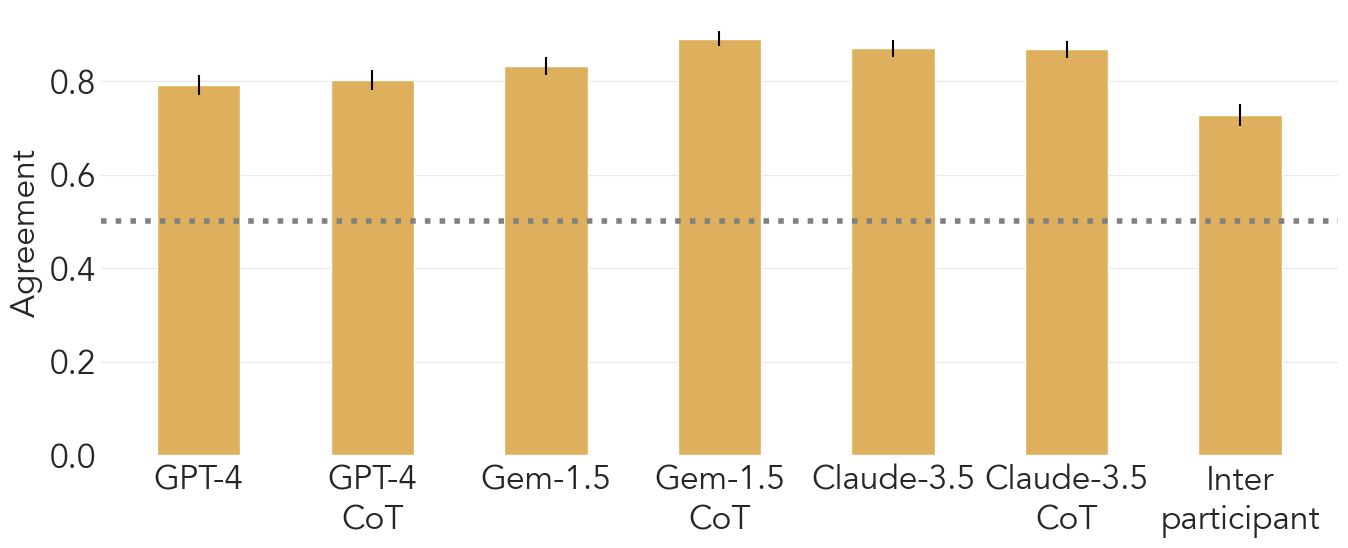

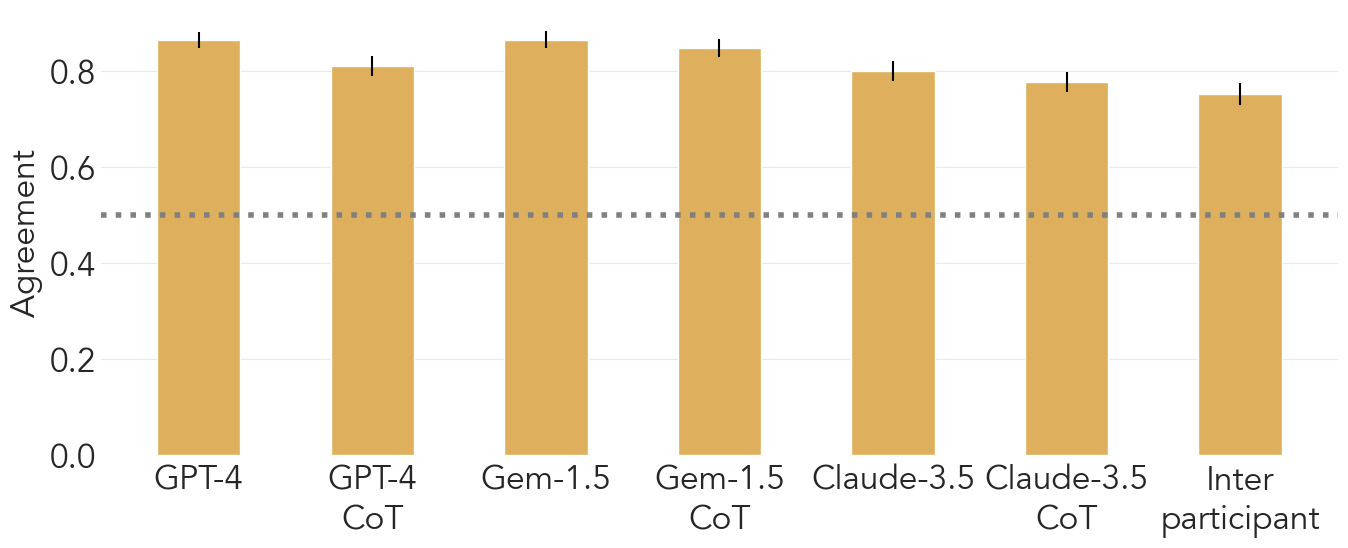

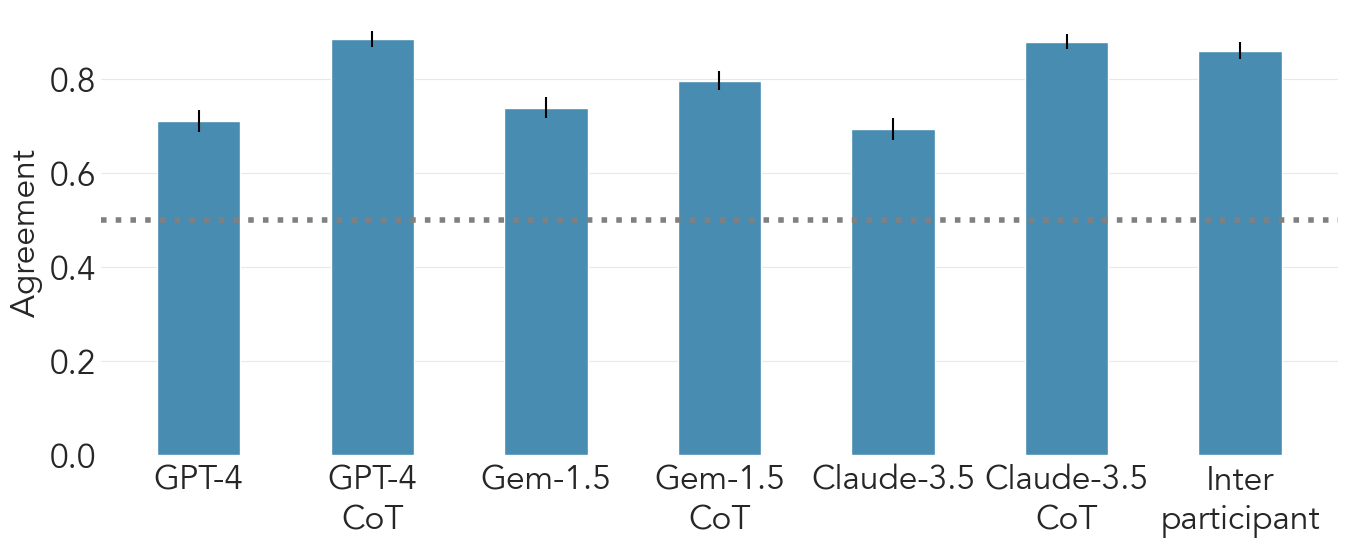

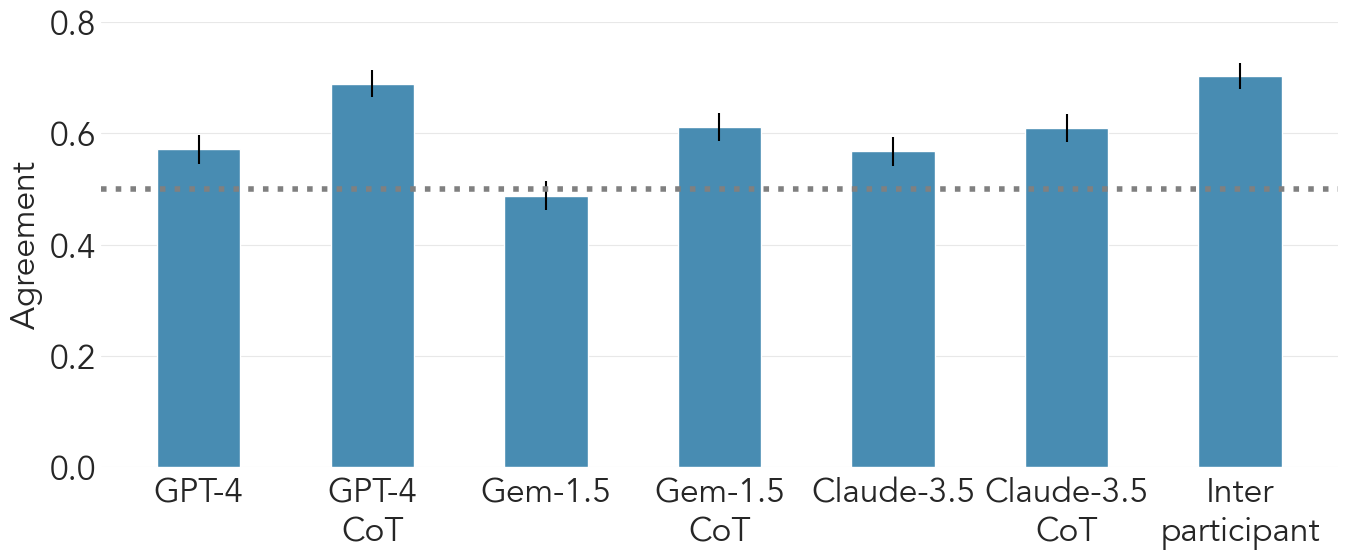

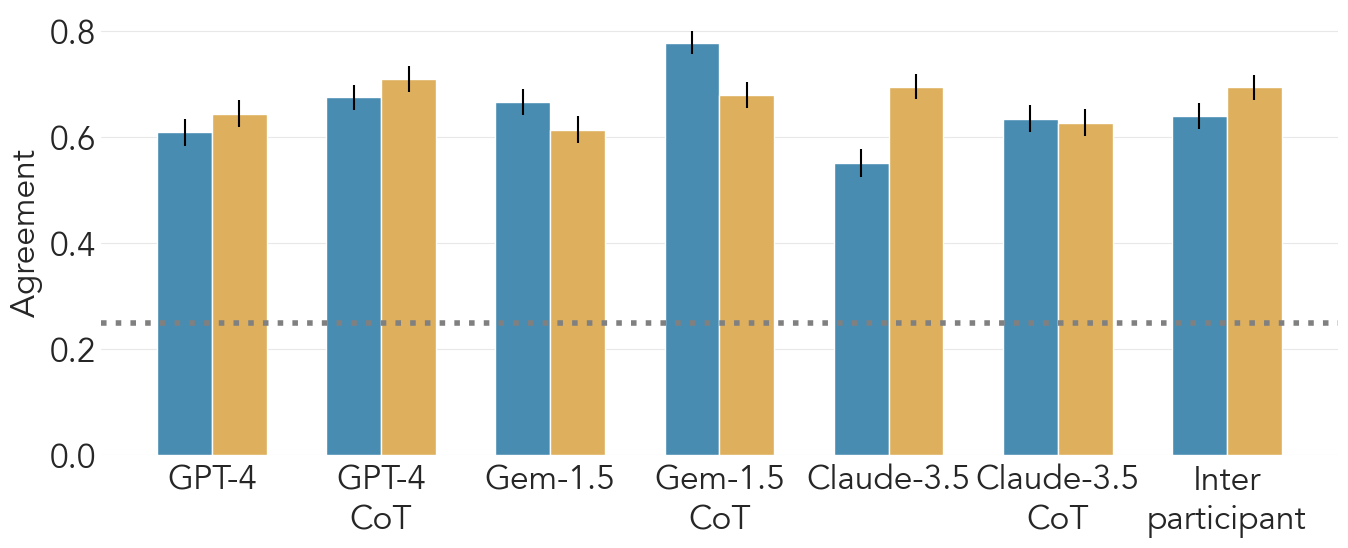

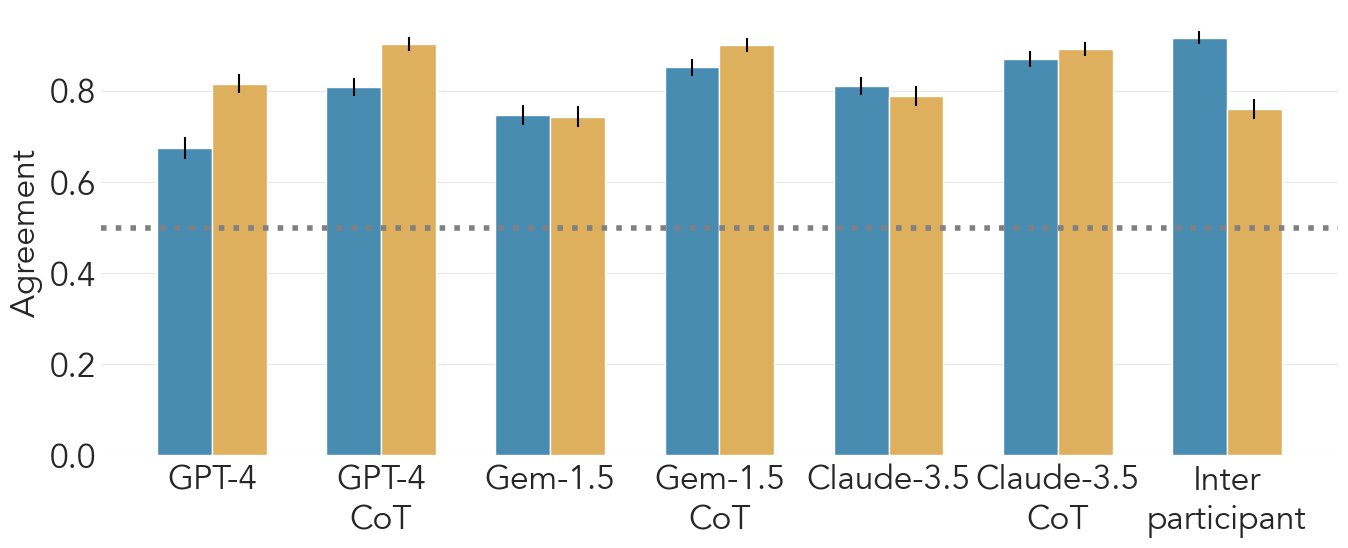

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams["font.family"] = "Avenir"
plt.rcParams["font.size"] = 24

# keys are save_title, values are the keys in model_means and model_sems
plot_dict = {
    "control": ["control_inference"],
    "expected": ["expected_inference"],
    "goal": ["goal_inference"],
    "safety": ["safety_inference"],
    "emotion": ["emotion_inference_goal_control", "emotion_inference_safety_expected"],
    "outcome": ["outcome_inference_goal_control", "outcome_inference_safety_expected"]
}
# make all plots
for save_title in plot_dict.keys():
    keys = plot_dict[save_title]
    categories = keys


    labels = ["GPT-4", "GPT-4\nCoT",  "Gem-1.5", "Gem-1.5\nCoT", "Claude-3.5", "Claude-3.5\nCoT", "Inter\nparticipant"]


    # Initialize figure
    plt.figure(figsize=(14, 6))
    barWidth = 1.2
    gap = 1.3  # Increase this value to increase space between groups of bars



    # Determine the number of model methods for dynamic positioning
    model_methods = list(model_means.keys())  # Extract model methods from data

    model_methods = ["azure_gpt-4_0shot", "azure_gpt-4_0shot_cot",  "gemini-1.5-pro-002_0shot", "gemini-1.5-pro-002_0shot_cot","claude-3-5-sonnet-20240620_0shot", "claude-3-5-sonnet-20240620_0shot_cot","interparticipant"]
    # model_methods = [k for k in model_methods if "partici" not in k]
    print(save_title)
    print(model_methods)
    num_model_methods = len(model_methods)
    num_categories = len(categories)

    # Calculate positions with increased gap
    positions = np.arange(num_model_methods) * (barWidth * num_categories + gap)

    # Adjust the positions for x-ticks to be at the center of each group of bars
    adjusted_positions = positions + (barWidth * (num_categories-1)) / 2

    # Color palette

    colorblind_palette = sns.color_palette('colorblind', n_colors=num_categories)
    if num_categories == 1:

        colorblind_palette = sns.color_palette('colorblind', n_colors=num_categories+1)
    if "col" in save_title:
        colorblind_palette = sns.color_palette('colorblind', n_colors=num_categories+4)
        
    colorblind_palette = [change_saturation(color, 0.6) for color in colorblind_palette]
    # Plot bars
    for i, key in enumerate(keys):
        means = [model_means[method][key] for method in model_methods if key in model_means[method]]
        sems = [model_sems[method][key] for method in model_methods if key in model_sems[method]]
        if (collapse == "goal" or collapse == "safety") and i == 1:
            j = 4
        elif (collapse == "control" or collapse == "expected") and i == 1:
            j = 1
        elif collapse == None and i == 0 and len(categories) == 1 and ("control" in keys[0] or "expected" in keys[0]):
            j = 1
        elif collapse == None and i == 1:
            j = 1
        elif collapse == None and i == 2:
            j=4
        elif collapse == None and i ==3:
            j=2
        else:
            j = i
        print(j,i)
        if key == "outcome_inference_goal_control":
            print(means[-1], j)
        plt.bar(positions + i*barWidth, means, yerr=sems, width=barWidth, color=colorblind_palette[j])


    # draw a dotted line at chance level
    plt.axhline(y=model_means["chance"][keys[0]], color='grey', linestyle=':', linewidth=4)

    # Adjusting the plot
    plt.ylabel('Agreement')
    plt.xticks(adjusted_positions, labels, rotation=0)
    sns.despine(left=True, bottom=True)
    plt.grid(True, which='major', axis='y', linestyle='-', color='lightgrey', alpha=0.5)
    plt.tick_params(axis='y', length=0)
    plt.tight_layout()
    # plt.legend(loc='best', bbox_to_anchor=(0.5, -0.05), ncol=num_categories, fancybox=True, shadow=True)
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8])
    # Show or save plot
    # plt.show()
    plt.savefig(save_title+".png", bbox_inches='tight')  # Uncomment to save the figure


## Paired t-tests and p-values

In [15]:
from scipy import stats
import numpy as np
import math

def paired_ttest(a, b):
    t_statistic, p_value = stats.ttest_rel(a, b)
    return t_statistic, p_value

import math
from scipy import stats

def paired_ttest_from_stats(mean1, mean2, ci1, ci2, n):
    """
    Perform a paired t-test using summary statistics.
    
    Parameters:
    mean1, mean2 : float
        The means of the two conditions
    ci1, ci2 : float
        The 95% confidence intervals of the means (defined as 1.96 * std / sqrt(n))
    n : int
        The sample size (assumed to be the same for both conditions)
    
    Returns:
    t_statistic : float
        The calculated t-statistic
    p_value : float
        The two-tailed p-value
    """
    # Calculate the mean difference
    mean_diff = mean1 - mean2
    
    # Convert CIs to standard deviations
    std1 = (ci1 * math.sqrt(n)) / 1.96
    std2 = (ci2 * math.sqrt(n)) / 1.96
    
    # Calculate the standard deviation of the differences
    # For paired data, we need to account for the correlation between measures
    # As we don't have this information, we'll use a conservative estimate
    # assuming no correlation (which will give us a larger p-value)
    std_diff = math.sqrt(std1**2 + std2**2)
    
    # Calculate the standard error of the mean difference
    se_diff = std_diff / math.sqrt(n)
    
    # Calculate the t-statistic
    t_statistic = mean_diff / se_diff
    
    # Degrees of freedom
    df = n - 1
    
    # Calculate the p-value
    p_value = stats.t.sf(abs(t_statistic), df) * 2
    
    return t_statistic, p_value

def independent_ttest(a, b, equal_var=True):
    """
    Perform an independent samples t-test.
    
    Parameters:
    a, b : array-like
        The two groups of samples to be compared.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test that assumes equal population variances.
        If False, perform Welch's t-test, which does not assume equal population variance.
    
    Returns:
    t_statistic : float
        The calculated t-statistic
    p_value : float
        The two-tailed p-value
    """
    t_statistic, p_value = stats.ttest_ind(a, b, equal_var=equal_var)
    return t_statistic, p_value

def independent_ttest_from_stats(mean1, ci1, n1, mean2, ci2, n2):
    """
    Perform an independent samples t-test using summary statistics.
    
    Parameters:
    mean1, mean2 : float
        The means of the two groups
    ci1, ci2 : float
        The confidence intervals of the mean for the two groups (defined as 1.96 * std / sqrt(n))
    n1, n2 : int
        The sample sizes of the two groups
    
    Returns:
    t_statistic : float
        The calculated t-statistic
    p_value : float
        The two-tailed p-value
    """
    # Convert SEM to standard deviation
    std1 = (ci1 * math.sqrt(n1)) / 1.96
    std2 = (ci2 * math.sqrt(n2)) / 1.96
    
    # Calculate the standard error
    se1, se2 = std1**2/n1, std2**2/n2
    se = math.sqrt(se1 + se2)
    
    # Calculate the t-statistic
    t_statistic = (mean1 - mean2) / se
    
    # Calculate the degrees of freedom using the Welch–Satterthwaite equation
    df = (se1 + se2)**2 / (se1**2 / (n1-1) + se2**2 / (n2-1))
    
    # Calculate the p-value
    p_value = stats.t.sf(abs(t_statistic), df) * 2
    
    return t_statistic, p_value

def accuracy_vs_chance(mean_accuracy, num_responses, std_dev, chance_level):
    """
    Performs a one-sample t-test to compare mean accuracy to chance level.
    
    Parameters:
    mean_accuracy (float): The observed mean accuracy (between 0 and 1)
    num_responses (int): The number of responses (sample size)
    std_dev (float): The standard deviation of the accuracies
    chance_level (float): The chance level to compare against (default is 0.5)
    
    Returns:
    t_statistic : float
        The calculated t-statistic
    p_value : float
        The two-tailed p-value
    """
    
    # Calculate the t-statistic
    t_stat = (mean_accuracy - chance_level) / (std_dev / (num_responses ** 0.5))
    
    # Calculate the degrees of freedom
    df = num_responses - 1
    
    # Perform the t-test (two-tailed)
    p_value = stats.t.sf(abs(t_stat), df) * 2
    
    # Return the results
    return t_stat, p_value

In [16]:
condition_num_participants.keys()

dict_keys(['goal_control/outcome_joyful_0', 'safety_expected/emotion_resigned_0', 'safety_expected/belief_a_relieved_1', 'safety_expected/belief_b_relieved_0', 'goal_control/belief_b_joyful_0', 'safety_expected/belief_b_resigned_1', 'goal_control/belief_a_grateful_0', 'safety_expected/emotion_relieved_0', 'goal_control/belief_a_joyful_0', 'goal_control/belief_b_frustrated_1', 'safety_expected/belief_a_surprised_0', 'safety_expected/emotion_relieved_1', 'goal_control/belief_b_joyful_1', 'goal_control/belief_b_grateful_0', 'goal_control/emotion_frustrated_0', 'safety_expected/outcome_surprised_1', 'goal_control/emotion_joyful_1', 'goal_control/belief_a_disappointed_0', 'safety_expected/emotion_surprised_1', 'safety_expected/belief_a_resigned_0', 'goal_control/belief_b_disappointed_1', 'goal_control/outcome_frustrated_1', 'goal_control/belief_a_frustrated_1', 'safety_expected/outcome_relieved_0', 'safety_expected/outcome_devastated_0', 'safety_expected/outcome_relieved_1', 'goal_control/o

In [17]:
# Test 1 Participants goal inference vs Participants safety inference
pp_goal_inference_mean = model_means["interparticipant"]["goal_inference"]
pp_safety_inference_mean = model_means["interparticipant"]["safety_inference"]
pp_goal_inference_ci = model_sems["interparticipant"]["goal_inference"]
pp_safety_inference_ci = model_sems["interparticipant"]["safety_inference"]
pp_goal_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "goal_control/belief_b" in condition])
pp_safety_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "safety_expected/belief_b" in condition])
t_statistic, p_value = independent_ttest_from_stats(pp_goal_inference_mean, pp_goal_inference_ci, pp_goal_inference_n, pp_safety_inference_mean, pp_safety_inference_ci, pp_safety_inference_n)
print("Test 1: Participants goal inference vs Participants safety inference")
print("mean, 95%CI, n", pp_goal_inference_mean, pp_goal_inference_ci, pp_goal_inference_n)
print("mean, 95%CI, n", pp_safety_inference_mean, pp_safety_inference_ci, pp_safety_inference_n)
print("t-statistic:", t_statistic)
print("p-value:", p_value)



Test 1: Participants goal inference vs Participants safety inference
mean, 95%CI, n 0.8609364081062194 0.017927862507113923 1431
mean, 95%CI, n 0.7031029619181947 0.02378101310061014 1418
t-statistic: 10.387398789504731
p-value: 8.442655786837478e-25


In [18]:

# Test 2 Inter-Participants agreement vs Participant-label agreement for outcome inference in safety-expected condition
pp_outcome_inference_mean = model_means["interparticipant"]["emotion_inference_safety_expected"]
pp_outcome_inference_ci = model_sems["interparticipant"]["emotion_inference_safety_expected"]
pp_outcome_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "safety_expected/emotion" in condition])
pp_label_inference_mean = 0.41487839771101576 
pp_label_inference_ci = 0.01826295146825425
pp_label_inference_n = pp_outcome_inference_n
# paired t-test
t_statistic, p_value = paired_ttest_from_stats(pp_outcome_inference_mean, pp_label_inference_mean, pp_outcome_inference_ci, pp_label_inference_ci, pp_outcome_inference_n)
print("Test 2: Inter-Participants agreement vs Participant-label agreement for outcome inference in safety-expected condition")
print("mean, 95%CI, n", pp_outcome_inference_mean, pp_outcome_inference_ci, pp_outcome_inference_n)
print("mean, 95%CI, n", pp_label_inference_mean, pp_label_inference_ci, pp_label_inference_n)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

Test 2: Inter-Participants agreement vs Participant-label agreement for outcome inference in safety-expected condition
mean, 95%CI, n 0.6938483547925608 0.02416034134713874 1398
mean, 95%CI, n 0.41487839771101576 0.01826295146825425 1398
t-statistic: 18.053768676206115
p-value: 1.187820610741388e-65


In [19]:

# Test 3 Inter-Participants agreement vs Claude-3 opus 0-shot cot agreement for emotion inference in safety-expectedness condition
pp_emotion_inference_mean = model_means["interparticipant"]["emotion_inference_safety_expected"]
pp_emotion_inference_ci = model_sems["interparticipant"]["emotion_inference_safety_expected"]
pp_emotion_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "safety_expected/emotion" in condition])

claude_emotion_inference_mean = model_means["claude-3-opus-20240229_0shot_cot"]["emotion_inference_safety_expected"]
claude_emotion_inference_ci = model_sems["claude-3-opus-20240229_0shot_cot"]["emotion_inference_safety_expected"]
claude_emotion_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "safety_expected/emotion" in condition])

t_statistic, p_value = paired_ttest_from_stats(pp_emotion_inference_mean,claude_emotion_inference_mean, pp_emotion_inference_ci,claude_emotion_inference_ci, pp_emotion_inference_n)
print("Test 3: Inter-Participants agreement vs Claude-3 opus 0-shot cot agreement for emotion inference in safety-expectedness condition")
print("mean, 95%CI, n", pp_emotion_inference_mean, pp_emotion_inference_ci, pp_emotion_inference_n)
print("mean, 95%CI, n", claude_emotion_inference_mean, claude_emotion_inference_ci, claude_emotion_inference_n)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

Test 3: Inter-Participants agreement vs Claude-3 opus 0-shot cot agreement for emotion inference in safety-expectedness condition
mean, 95%CI, n 0.6938483547925608 0.02416034134713874 1398
mean, 95%CI, n 0.7882689556509299 0.02141568484091516 1398
t-statistic: -5.73212015203571
p-value: 1.2134873092981695e-08


In [22]:
# Test 3b Inter-Participants agreement vs gemini-1.5-pro-002 0-shot cot agreement for emotion inference in goal_control condition
pp_emotion_inference_mean = model_means["interparticipant"]["emotion_inference_goal_control"]
pp_emotion_inference_ci = model_sems["interparticipant"]["emotion_inference_goal_control"]
pp_emotion_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "goal_control/emotion" in condition])

gemini_emotion_inference_mean = model_means["gemini-1.5-pro-002_0shot_cot"]["emotion_inference_goal_control"]
gemini_emotion_inference_ci = model_sems["gemini-1.5-pro-002_0shot_cot"]["emotion_inference_goal_control"]
gemini_emotion_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "goal_control/emotion" in condition])

t_statistic, p_value = paired_ttest_from_stats(pp_emotion_inference_mean,gemini_emotion_inference_mean, pp_emotion_inference_ci,gemini_emotion_inference_ci, pp_emotion_inference_n)
print("Test 3b: Inter-Participants agreement vs gemini-1.5-pro-002 0-shot cot agreement for emotion inference in goal_control condition")
print("mean, 95%CI, n", pp_emotion_inference_mean, pp_emotion_inference_ci, pp_emotion_inference_n, pp_emotion_inference_mean-pp_emotion_inference_ci, pp_emotion_inference_mean+pp_emotion_inference_ci)
print("mean, 95%CI, n", gemini_emotion_inference_mean, gemini_emotion_inference_ci, gemini_emotion_inference_n, gemini_emotion_inference_mean-gemini_emotion_inference_ci, gemini_emotion_inference_mean+gemini_emotion_inference_ci)
print("t-statistic:", t_statistic)
print("p-value:", p_value)


Test 3b: Inter-Participants agreement vs gemini-1.5-pro-002 0-shot cot agreement for emotion inference in goal_control condition
mean, 95%CI, n 0.6396903589021815 0.024962143561646142 1421 0.6147282153405353 0.6646525024638277
mean, 95%CI, n 0.7783251231527094 0.021597217145484505 1421 0.756727906007225 0.7999223402981939
t-statistic: -8.231992309542283
p-value: 4.1257427909922136e-16


In [23]:

# Test 4 GPT-4 0-shot cot agreement vs Claude-3 opus 0-shot cot agreement for emotion inference in safety-expectedness condition
gpt_emotion_inference_mean = model_means["azure_gpt-4_0shot_cot"]["emotion_inference_safety_expected"]
gpt_emotion_inference_ci = model_sems["azure_gpt-4_0shot_cot"]["emotion_inference_safety_expected"]
gpt_emotion_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "safety_expected/emotion" in condition])

claude_emotion_inference_mean = model_means["claude-3-opus-20240229_0shot_cot"]["emotion_inference_safety_expected"]
claude_emotion_inference_ci = model_sems["claude-3-opus-20240229_0shot_cot"]["emotion_inference_safety_expected"]
claude_emotion_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "safety_expected/emotion" in condition])

t_statistic, p_value = paired_ttest_from_stats(gpt_emotion_inference_mean,claude_emotion_inference_mean, gpt_emotion_inference_ci,claude_emotion_inference_ci, gpt_emotion_inference_n)
print("Test 4: GPT-4 0-shot cot agreement vs Claude-3 opus 0-shot cot agreement for emotion inference in safety-expectedness condition")
print("mean, 95%CI, n", gpt_emotion_inference_mean, gpt_emotion_inference_ci, gpt_emotion_inference_n)
print("mean, 95%CI, n", claude_emotion_inference_mean, claude_emotion_inference_ci, claude_emotion_inference_n)
print("t-statistic:", t_statistic)
print("p-value:", p_value)




Test 4: GPT-4 0-shot cot agreement vs Claude-3 opus 0-shot cot agreement for emotion inference in safety-expectedness condition
mean, 95%CI, n 0.709585121602289 0.023796559263770757 1398
mean, 95%CI, n 0.7882689556509299 0.02141568484091516 1398
t-statistic: -4.817250029503154
p-value: 1.614090683338511e-06


In [23]:
# Test 4b GPT-4 0-shot cot agreement vs gemini-1.5-pro-002 0-shot cot agreement for emotion inference in goal_control condition
gpt_emotion_inference_mean = model_means["azure_gpt-4_0shot_cot"]["emotion_inference_goal_control"]
gpt_emotion_inference_ci = model_sems["azure_gpt-4_0shot_cot"]["emotion_inference_goal_control"]
gpt_emotion_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "goal_control/emotion" in condition])

gemini_emotion_inference_mean = model_means["gemini-1.5-pro-002_0shot_cot"]["emotion_inference_goal_control"]
gemini_emotion_inference_ci = model_sems["gemini-1.5-pro-002_0shot_cot"]["emotion_inference_goal_control"]
gemini_emotion_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "goal_control/emotion" in condition])

t_statistic, p_value = paired_ttest_from_stats(gpt_emotion_inference_mean,gemini_emotion_inference_mean, gpt_emotion_inference_ci,gemini_emotion_inference_ci, gpt_emotion_inference_n)
print("Test 4b: GPT-4 0-shot cot agreement vs gemini-1.5-pro-002 0-shot cot agreement for emotion inference in goal_control condition")
print("mean, 95%CI, n", gpt_emotion_inference_mean, gpt_emotion_inference_ci, gpt_emotion_inference_n, gpt_emotion_inference_mean-gpt_emotion_inference_ci, gpt_emotion_inference_mean+gpt_emotion_inference_ci)
print("mean, 95%CI, n", gemini_emotion_inference_mean, gemini_emotion_inference_ci, gemini_emotion_inference_n, gemini_emotion_inference_mean-gemini_emotion_inference_ci, gemini_emotion_inference_mean+gemini_emotion_inference_ci)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

Test 4b: GPT-4 0-shot cot agreement vs gemini-1.5-pro-002 0-shot cot agreement for emotion inference in goal_control condition
mean, 95%CI, n 0.6748768472906403 0.02435539883594755 1421 0.6505214484546928 0.6992322461265879
mean, 95%CI, n 0.7783251231527094 0.021597217145484505 1421 0.756727906007225 0.7999223402981939
t-statistic: -6.228782708262184
p-value: 6.180080587016782e-10


In [24]:
# Test 5 Gemini-1.5 pro 0-shot cot agreement vs Claude-3 opus 0-shot cot agreement for emotion inference in safety-expectedness condition
gemini_emotion_inference_mean = model_means["gemini-1.5-pro_0shot_cot"]["emotion_inference_safety_expected"]
gemini_emotion_inference_ci = model_sems["gemini-1.5-pro_0shot_cot"]["emotion_inference_safety_expected"]
gemini_emotion_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "safety_expected/emotion" in condition])

claude_emotion_inference_mean = model_means["claude-3-opus-20240229_0shot_cot"]["emotion_inference_safety_expected"]
claude_emotion_inference_ci = model_sems["claude-3-opus-20240229_0shot_cot"]["emotion_inference_safety_expected"]
claude_emotion_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "safety_expected/emotion" in condition])

t_statistic, p_value = paired_ttest_from_stats(gemini_emotion_inference_mean,claude_emotion_inference_mean, gemini_emotion_inference_ci,claude_emotion_inference_ci, gemini_emotion_inference_n)
print("Test 5: Gemini-1.5 pro 0-shot cot agreement vs Claude-3 opus 0-shot cot agreement for emotion inference in safety-expectedness condition")
print("mean, 95%CI, n", gemini_emotion_inference_mean, gemini_emotion_inference_ci, gemini_emotion_inference_n)
print("mean, 95%CI, n", claude_emotion_inference_mean, claude_emotion_inference_ci, claude_emotion_inference_n)
print("t-statistic:", t_statistic)
print("p-value:", p_value)


Test 5: Gemini-1.5 pro 0-shot cot agreement vs Claude-3 opus 0-shot cot agreement for emotion inference in safety-expectedness condition
mean, 95%CI, n 0.600143061516452 0.0256792419125087 1398
mean, 95%CI, n 0.7882689556509299 0.02141568484091516 1398
t-statistic: -11.02739827005326
p-value: 3.5875130839710666e-27


In [24]:
# Test 5b claude-3.5-sonnet 0-shot cot agreement vs gemini-1.5-pro-002 0-shot cot agreement for emotion inference in goal_control condition
claude_emotion_inference_mean = model_means["claude-3-5-sonnet-20240620_0shot_cot"]["emotion_inference_goal_control"]
claude_emotion_inference_ci = model_sems["claude-3-5-sonnet-20240620_0shot_cot"]["emotion_inference_goal_control"]
claude_emotion_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "goal_control/emotion" in condition])

gemini_emotion_inference_mean = model_means["gemini-1.5-pro-002_0shot_cot"]["emotion_inference_goal_control"]
gemini_emotion_inference_ci = model_sems["gemini-1.5-pro-002_0shot_cot"]["emotion_inference_goal_control"]
gemini_emotion_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "goal_control/emotion" in condition])

t_statistic, p_value = paired_ttest_from_stats(claude_emotion_inference_mean,gemini_emotion_inference_mean, claude_emotion_inference_ci,gemini_emotion_inference_ci, claude_emotion_inference_n)
print("Test 5b: claude-3.5-sonnet 0-shot cot agreement vs gemini-1.5-pro-002 0-shot cot agreement for emotion inference in goal_control condition")
print("mean, 95%CI, n", claude_emotion_inference_mean, claude_emotion_inference_ci, claude_emotion_inference_n, claude_emotion_inference_mean-claude_emotion_inference_ci, claude_emotion_inference_mean+claude_emotion_inference_ci)
print("mean, 95%CI, n", gemini_emotion_inference_mean, gemini_emotion_inference_ci, gemini_emotion_inference_n, gemini_emotion_inference_mean-gemini_emotion_inference_ci, gemini_emotion_inference_mean+gemini_emotion_inference_ci)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

Test 5b: claude-3.5-sonnet 0-shot cot agreement vs gemini-1.5-pro-002 0-shot cot agreement for emotion inference in goal_control condition
mean, 95%CI, n 0.6347642505277973 0.025035248246069185 1421 0.6097290022817281 0.6597994987738665
mean, 95%CI, n 0.7783251231527094 0.021597217145484505 1421 0.756727906007225 0.7999223402981939
t-statistic: -8.51023720720573
p-value: 4.3465622794533526e-17


In [26]:

# Test 6 Inter-Participants agreement vs Claude-3.5 Sonnet 0-shot cot agreement for outcome inference in safety-expected condition
pp_outcome_inference_mean = model_means["interparticipant"]["outcome_inference_safety_expected"]
pp_outcome_inference_ci = model_sems["interparticipant"]["outcome_inference_safety_expected"]
pp_outcome_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "safety_expected/outcome" in condition])

claude_outcome_inference_mean = model_means["claude-3-5-sonnet-20240620_0shot_cot"]["outcome_inference_safety_expected"]
claude_outcome_inference_ci = model_sems["claude-3-5-sonnet-20240620_0shot_cot"]["outcome_inference_safety_expected"]
claude_outcome_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "safety_expected/outcome" in condition])

t_statistic, p_value = paired_ttest_from_stats(pp_outcome_inference_mean,claude_outcome_inference_mean, pp_outcome_inference_ci,claude_outcome_inference_ci, pp_outcome_inference_n)
print("Test 6: Inter-Participants agreement vs Claude-3.5 sonnet 0-shot cot agreement for outcome inference in safety-expected condition")
print("mean, 95%CI, n", pp_outcome_inference_mean, pp_outcome_inference_ci, pp_outcome_inference_n, pp_outcome_inference_mean-pp_outcome_inference_ci, pp_outcome_inference_mean+pp_outcome_inference_ci)
print("mean, 95%CI, n", claude_outcome_inference_mean, claude_outcome_inference_ci, claude_outcome_inference_n, claude_outcome_inference_mean-claude_outcome_inference_ci, claude_outcome_inference_mean+claude_outcome_inference_ci)
print("t-statistic:", t_statistic)
print("p-value:", p_value)



Test 6: Inter-Participants agreement vs Claude-3.5 sonnet 0-shot cot agreement for outcome inference in safety-expected condition
mean, 95%CI, n 0.7609756097560976 0.022066659768506882 1435 0.7389089499875907 0.7830422695246044
mean, 95%CI, n 0.89198606271777 0.016060129899134353 1435 0.8759259328186357 0.9080461926169043
t-statistic: -9.408560110772743
p-value: 1.9250437563886134e-20


In [27]:

# Test 7 Inter-Participants agreement vs gpt4 0-shot cot agreement for outcome inference in goal-control condition
pp_outcome_inference_mean = model_means["interparticipant"]["outcome_inference_goal_control"]
pp_outcome_inference_ci = model_sems["interparticipant"]["outcome_inference_goal_control"]
pp_outcome_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "goal_control/outcome" in condition])

gpt_outcome_inference_mean = model_means["azure_gpt-4_0shot_cot"]["outcome_inference_goal_control"]
gpt_outcome_inference_ci = model_sems["azure_gpt-4_0shot_cot"]["outcome_inference_goal_control"]
gpt_outcome_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "goal_control/outcome" in condition])

t_statistic, p_value = paired_ttest_from_stats(pp_outcome_inference_mean,gpt_outcome_inference_mean, pp_outcome_inference_ci,gpt_outcome_inference_ci, pp_outcome_inference_n)
print("Test 7: Inter-Participants agreement vs gpt4 pro 0-shot cot agreement for outcome inference in goal-control condition")
print("mean, 95%CI, n", pp_outcome_inference_mean, pp_outcome_inference_ci, pp_outcome_inference_n, pp_outcome_inference_mean-pp_outcome_inference_ci, pp_outcome_inference_mean+pp_outcome_inference_ci)
print("mean, 95%CI, n", gpt_outcome_inference_mean, gpt_outcome_inference_ci, gpt_outcome_inference_n, gpt_outcome_inference_mean-gpt_outcome_inference_ci, gpt_outcome_inference_mean+gpt_outcome_inference_ci)
print("t-statistic:", t_statistic)
print("p-value:", p_value)


Test 7: Inter-Participants agreement vs gpt4 pro 0-shot cot agreement for outcome inference in goal-control condition
mean, 95%CI, n 0.9167254763585039 0.014386225888033802 1417 0.90233925047047 0.9311117022465377
mean, 95%CI, n 0.8087508821453776 0.020477562033774765 1417 0.7882733201116028 0.8292284441791524
t-statistic: 8.456458302277676
p-value: 6.766074280125275e-17


In [29]:
# Test 7b claude expression vs no expression outcome inference in goal-control condition
claude_outcome_inference_mean = model_means["claude-3-5-sonnet-20240620_0shot_cot"]["outcome_inference_goal_control"]
claude_outcome_inference_ci = model_sems["claude-3-5-sonnet-20240620_0shot_cot"]["outcome_inference_goal_control"]
claude_outcome_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "goal_control/outcome" in condition])

x_claude_inference_mean = 0.7314487632508834
x_claude_inference_ci = 0.02309273673236959
x_claude_inference_n = 1415

t_statistic, p_value = paired_ttest_from_stats(claude_outcome_inference_mean,x_claude_inference_mean, claude_outcome_inference_ci,x_claude_inference_ci, claude_outcome_inference_n)
print("Test 7b: claude no expression vs expression outcome inference in goal-control condition")
print("mean, 95%CI, n", claude_outcome_inference_mean, claude_outcome_inference_ci, claude_outcome_inference_n, claude_outcome_inference_mean-claude_outcome_inference_ci, claude_outcome_inference_mean+claude_outcome_inference_ci)
print("mean, 95%CI, n", x_claude_inference_mean, x_claude_inference_ci, x_claude_inference_n, x_claude_inference_mean-x_claude_inference_ci, x_claude_inference_mean+x_claude_inference_ci)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

Test 7b: claude no expression vs expression outcome inference in goal-control condition
mean, 95%CI, n 0.8701482004234298 0.01750216387132052 1417 0.8526460365521092 0.8876503642947503
mean, 95%CI, n 0.7314487632508834 0.02309273673236959 1415 0.7083560265185138 0.7545414999832529
t-statistic: 9.381979846055236
p-value: 2.481875849961215e-20


In [32]:

# Test 8 Inter-participant control inference vs claude-35 sonnet cot agreement for control inference 
pp_control_inference_mean = model_means["interparticipant"]["control_inference"]
pp_control_inference_ci = model_sems["interparticipant"]["control_inference"]
pp_control_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "control/belief_b" in condition])

claude_control_inference_mean = model_means["claude-3-5-sonnet-20240620_0shot_cot"]["control_inference"]
claude_control_inference_ci = model_sems["claude-3-5-sonnet-20240620_0shot_cot"]["control_inference"]
claude_control_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "control/belief_b" in condition])

t_statistic, p_value = paired_ttest_from_stats(pp_control_inference_mean,claude_control_inference_mean, pp_control_inference_ci,claude_control_inference_ci, pp_control_inference_n)
print("Test 8: Inter-participant control inference vs claude-35 sonnet  cot agreement for control inference ")
print("mean, 95%CI, n", pp_control_inference_mean, pp_control_inference_ci, pp_control_inference_n, pp_control_inference_mean-pp_control_inference_ci, pp_control_inference_mean+pp_control_inference_ci)
print("mean, 95%CI, n", claude_control_inference_mean, claude_control_inference_ci, claude_control_inference_n, claude_control_inference_mean-claude_control_inference_ci, claude_control_inference_mean+claude_control_inference_ci)
print("t-statistic:", t_statistic)
print("p-value:", p_value)



Test 8: Inter-participant control inference vs claude-35 sonnet  cot agreement for control inference 
mean, 95%CI, n 0.7278525868178597 0.02322289639808071 1431 0.704629690419779 0.7510754832159404
mean, 95%CI, n 0.8674698795180723 0.01769200538549322 1431 0.8497778741325791 0.8851618849035655
t-statistic: -9.373385938901313
p-value: 2.646229084146691e-20


In [ ]:

# Test 9 Inter-participant expected inference vs claude-3 sonnet cot agreement for safety inference
pp_safety_inference_mean = model_means["interparticipant"]["safety_inference"]
pp_safety_inference_ci = model_sems["interparticipant"]["safety_inference"]
pp_safety_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "safety_expected/belief_b" in condition])

claude_safety_inference_mean = model_means["claude-3-5-sonnet-20240620_0shot_cot"]["safety_inference"]
claude_safety_inference_ci = model_sems["claude-3-5-sonnet-20240620_0shot_cot"]["safety_inference"]
claude_safety_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "safety_expected/belief_b" in condition])

t_statistic, p_value = paired_ttest_from_stats(pp_safety_inference_mean,claude_safety_inference_mean, pp_safety_inference_ci,claude_safety_inference_ci, pp_safety_inference_n)
print("Test 9: Inter-participant expected inference vs claude-35 sonnet cot agreement for expected inference")
print("mean, 95%CI, n", pp_safety_inference_mean, pp_safety_inference_ci, pp_safety_inference_n, pp_safety_inference_mean-pp_safety_inference_ci, pp_safety_inference_mean+pp_safety_inference_ci)
print("mean, 95%CI, n", claude_safety_inference_mean, claude_safety_inference_ci, claude_safety_inference_n, claude_safety_inference_mean-claude_safety_inference_ci, claude_safety_inference_mean+claude_safety_inference_ci)
print("t-statistic:", t_statistic)
print("p-value:", p_value)



Test 9: Inter-participant expected inference vs claude-35 sonnet cot agreement for expected inference
mean, 95%CI, n 0.7031029619181947 0.02378101310061014 1418 0.6793219488175846 0.7268839750188048
mean, 95%CI, n 0.609308885754584 0.02539530766505459 1418 0.5839135780895294 0.6347041934196386
t-statistic: 5.283924173741084
p-value: 1.4623001701183452e-07


In [29]:

# Test 10 GPT-4 0shot mean agreement vs GPT-4 cot mean agreement for goal inference
gpt_cot_goal_inference_mean = model_means["azure_gpt-4_0shot_cot"]["goal_inference"]
gpt_cot_goal_inference_ci = model_sems["azure_gpt-4_0shot_cot"]["goal_inference"]
gpt_cot_goal_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "goal_control/belief_b" in condition])

gpt_goal_inference_mean = model_means["azure_gpt-4_0shot"]["goal_inference"]
gpt_goal_inference_ci = model_sems["azure_gpt-4_0shot"]["goal_inference"]
gpt_goal_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "goal_control/belief_b" in condition])

t_statistic, p_value = paired_ttest_from_stats(gpt_goal_inference_mean,gpt_cot_goal_inference_mean, gpt_goal_inference_ci,gpt_cot_goal_inference_ci, gpt_goal_inference_n)
print("Test 10: GPT-4 0shot mean agreement vs GPT-4 cot mean agreement for goal inference")
print("mean, 95%CI, n", gpt_goal_inference_mean, gpt_goal_inference_ci, gpt_goal_inference_n)
print("mean, 95%CI, n", gpt_cot_goal_inference_mean, gpt_cot_goal_inference_ci, gpt_cot_goal_inference_n)
print("t-statistic:", t_statistic)
print("p-value:", p_value)


Test 10: GPT-4 0shot mean agreement vs GPT-4 cot mean agreement for goal inference
mean, 95%CI, n 0.7113906359189378 0.023477158691962405 1431
mean, 95%CI, n 0.8860936408106219 0.016460766322074754 1431
t-statistic: -11.942223433065553
p-value: 2.10057408294601e-31


In [35]:

# Test 11 Claude-3 opus 0shot mean agreement vs Claude-3 opus cot mean agreement for goal inference
claude_cot_goal_inference_mean = model_means["claude-3-5-sonnet-20240620_0shot_cot"]["goal_inference"]
claude_cot_goal_inference_ci = model_sems["claude-3-5-sonnet-20240620_0shot_cot"]["goal_inference"]
claude_cot_goal_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "goal_control/belief_b" in condition])

claude_goal_inference_mean = model_means["claude-3-5-sonnet-20240620_0shot"]["goal_inference"]
claude_goal_inference_ci = model_sems["claude-3-5-sonnet-20240620_0shot"]["goal_inference"]
claude_goal_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "goal_control/belief_b" in condition])

t_statistic, p_value = paired_ttest_from_stats(claude_goal_inference_mean,claude_cot_goal_inference_mean, claude_goal_inference_ci,claude_cot_goal_inference_ci, claude_goal_inference_n)
print("Test 11: Claude-3 opus 0shot mean agreement vs Claude-3 opus cot mean agreement for goal inference")
print("mean, 95%CI, n", claude_goal_inference_mean, claude_goal_inference_ci, claude_goal_inference_n, claude_goal_inference_mean-claude_goal_inference_ci, claude_goal_inference_mean+claude_goal_inference_ci)
print("mean, 95%CI, n", claude_cot_goal_inference_mean, claude_cot_goal_inference_ci, claude_cot_goal_inference_n, claude_cot_goal_inference_mean-claude_cot_goal_inference_ci, claude_cot_goal_inference_mean+claude_cot_goal_inference_ci)
print("t-statistic:", t_statistic)
print("p-value:", p_value)


Test 11: Claude-3 opus 0shot mean agreement vs Claude-3 opus cot mean agreement for goal inference
mean, 95%CI, n 0.6939203354297694 0.02387856919090825 1431 0.6700417662388611 0.7177989046206776
mean, 95%CI, n 0.8805031446540881 0.016806603272414584 1431 0.8636965413816735 0.8973097479265026
t-statistic: -12.52399296995325
p-value: 3.2065350594321585e-34


In [36]:
# Test 11b gemini-1.5-pro-002 0shot mean agreement vs cot mean agreement for goal inference
gemini_cot_goal_inference_mean = model_means["gemini-1.5-pro-002_0shot_cot"]["goal_inference"]
gemini_cot_goal_inference_ci = model_sems["gemini-1.5-pro-002_0shot_cot"]["goal_inference"]
gemini_cot_goal_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "goal_control/belief_b" in condition])

gemini_goal_inference_mean = model_means["gemini-1.5-pro-002_0shot"]["goal_inference"]
gemini_goal_inference_ci = model_sems["gemini-1.5-pro-002_0shot"]["goal_inference"]
gemini_goal_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "goal_control/belief_b" in condition])

t_statistic, p_value = paired_ttest_from_stats(gemini_goal_inference_mean,gemini_cot_goal_inference_mean, gemini_goal_inference_ci,gemini_cot_goal_inference_ci, gemini_goal_inference_n)
print("Test 11b: gemini-1.5-pro-002 0shot mean agreement vs cot mean agreement for goal inference")
print("mean, 95%CI, n", gemini_goal_inference_mean, gemini_goal_inference_ci, gemini_goal_inference_n, gemini_goal_inference_mean-gemini_goal_inference_ci, gemini_goal_inference_mean+gemini_goal_inference_ci)
print("mean, 95%CI, n", gemini_cot_goal_inference_mean, gemini_cot_goal_inference_ci, gemini_cot_goal_inference_n, gemini_cot_goal_inference_mean-gemini_cot_goal_inference_ci, gemini_cot_goal_inference_mean+gemini_cot_goal_inference_ci)
print("t-statistic:", t_statistic)
print("p-value:", p_value)


Test 11b: gemini-1.5-pro-002 0shot mean agreement vs cot mean agreement for goal inference
mean, 95%CI, n 0.740041928721174 0.022725637280738793 1431 0.7173162914404352 0.7627675660019129
mean, 95%CI, n 0.7973445143256463 0.02082756228357089 1431 0.7765169520420755 0.8181720766092172
t-statistic: -3.643453176290359
p-value: 0.00027862300937992065


In [33]:
# Test 12 GPT-4 0shot inferring outcomes in goal-control condition vs chance
gpt_goal_inference_mean = model_means["azure_gpt-4_0shot"]["outcome_inference_goal_control"] 
gpt_goal_inference_ci = model_sems["azure_gpt-4_0shot"]["outcome_inference_goal_control"]
gpt_goal_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "goal_control/outcome" in condition])
gpt_goal_inference_std = gpt_goal_inference_ci * math.sqrt(gpt_goal_inference_n) / 1.96
gpt_goal_inference_chance = 0.5
t_statistic, p_value = accuracy_vs_chance(gpt_goal_inference_mean, gpt_goal_inference_n, gpt_goal_inference_std, gpt_goal_inference_chance)
print("Test 12: GPT-4 0shot inferring outcomes in goal-control condition vs chance")
print("mean, 95%CI, n", gpt_goal_inference_mean, gpt_goal_inference_ci, gpt_goal_inference_n)
print("t-statistic:", t_statistic)
print("p-value:", p_value)


Test 12: GPT-4 0shot inferring outcomes in goal-control condition vs chance
mean, 95%CI, n 0.6746647847565279 0.02439386998743782 1417
t-statistic: 14.03397567909856
p-value: 5.4638439451424384e-42


In [34]:
# Test 12 GPT-4 0shot inferring outcomes in safety-expected condition vs chance
gpt_safety_inference_mean = model_means["azure_gpt-4_0shot"]["outcome_inference_safety_expected"] 
gpt_safety_inference_ci = model_sems["azure_gpt-4_0shot"]["outcome_inference_safety_expected"]
gpt_safety_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "safety_expected/outcome" in condition])
gpt_safety_inference_std = gpt_safety_inference_ci * math.sqrt(gpt_safety_inference_n) / 1.96
gpt_safety_inference_chance = 0.5
t_statistic, p_value = accuracy_vs_chance(gpt_safety_inference_mean, gpt_safety_inference_n, gpt_safety_inference_std, gpt_safety_inference_chance)
print("Test 12: GPT-4 0shot inferring outcomes in safety-expected condition vs chance")
print("mean, 95%CI, n", gpt_safety_inference_mean, gpt_safety_inference_ci, gpt_safety_inference_n)
print("t-statistic:", t_statistic)
print("p-value:", p_value)


Test 12: GPT-4 0shot inferring outcomes in safety-expected condition vs chance
mean, 95%CI, n 0.8160278745644599 0.020047426538214938 1435
t-statistic: 30.897463720123717
p-value: 4.2879560638185104e-161
